In [1]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
def TimeSeriesPlot(x, y1, y2, pathNum, stop, legend=True, ylabel=None, label1=None, label2=None):
    plt.figure(figsize=(8, 5), dpi=100)
    plt.plot(x[x <= stop], y1[pathNum, x <= stop], label=label1)
    plt.plot(x[x <= stop], y2[pathNum, x <= stop], label=label2)
    plt.xlim([0, stop])
    # plt.ylim([1.06, 1.11])
    plt.ylabel(ylabel)
    plt.xlabel('Time')
    if legend:
        plt.legend()
    plt.show()

def DistributionPlot(func1, func2, title, label1, label2, binwidth):
    plt.figure(figsize=(8, 5), dpi=100)
    sns.histplot(func1[:, -1], binwidth=binwidth, binrange=[min(func1[:, -1].min(), func2[:,-1].min()), max(func1[:, -1].max(), func2[:,-1].max())], color='r', label=label1)
    sns.histplot(func2[:, -1], binwidth=binwidth, binrange=[min(func1[:, -1].min(), func2[:,-1].min()), max(func1[:, -1].max(), func2[:,-1].max())], color='b', label=label2)
    # plt.xlim([-50, 150])
    plt.xlim([min(func1[:, -1]), max(func1[:, -1])])
    plt.title(title)
    plt.legend()
    plt.show()
    
def CashPlot(func1, func2, pathNum):
    plt.figure(figsize=(8, 5), dpi=500)
    plt.plot(func1.getTime(), func1.GetCash()[pathNum, :], label='GBM')
    plt.plot(func2.getTime(), func2.GetCash()[pathNum, :], label='qGaussian')
    for i in range(0, func1.getnumSteps()):
        if func1.GetOrderConsumption()[pathNum, i] == 1:
            a = plt.scatter(func1.getTime()[i], func1.GetCash()[pathNum, i], color='b', s=9)
        if func1.GetOrderConsumption()[pathNum, i] == 2:
            b = plt.scatter(func1.getTime()[i], func1.GetCash()[pathNum, i], color='g', s=9)
        if func1.GetOrderConsumption()[pathNum, i] == 3:
            c = plt.scatter(func1.getTime()[i], func1.GetCash()[pathNum, i], color='r', s=9)
        if func1.GetOrderConsumption()[pathNum, i] == 4:
            d = plt.scatter(func1.getTime()[i], func1.GetCash()[pathNum, i], color='k', s=9)
        if func2.GetOrderConsumption()[pathNum, i] == 1:
            plt.scatter(func2.getTime()[i], func2.GetCash()[pathNum, i], color='b', s=9)
        if func2.GetOrderConsumption()[pathNum, i] == 2:
            plt.scatter(func2.getTime()[i], func2.GetCash()[pathNum, i], color='g', s=9)
        if func2.GetOrderConsumption()[pathNum, i] == 3:
            plt.scatter(func2.getTime()[i], func2.GetCash()[pathNum, i], color='r', s=9)
        if func2.GetOrderConsumption()[pathNum, i] == 4:
            plt.scatter(func2.getTime()[i], func2.GetCash()[pathNum, i], color='k', s=9)
    plt.xlim([0.0, func1.getTime()[-1]])
    plt.title('Cash vs time')
    plt.ylabel('Cash')
    plt.xlabel('Time')
    plt.legend()
    plt.legend((a, b, c, d), ('buy', 'sell', 'No matched order', 'both order matched'))
    plt.show()

# Meeting 22 June 22
## dt 0.01 vs 0.1

In [9]:
cash1 = np.loadtxt('Data/Meeting 22 June 22/test/T=1/dt=0.01/mm3 Cash.txt')
cash2 = np.loadtxt('Data/Meeting 22 June 22/test/T=1/dt=0.1/mm3 Cash.txt')

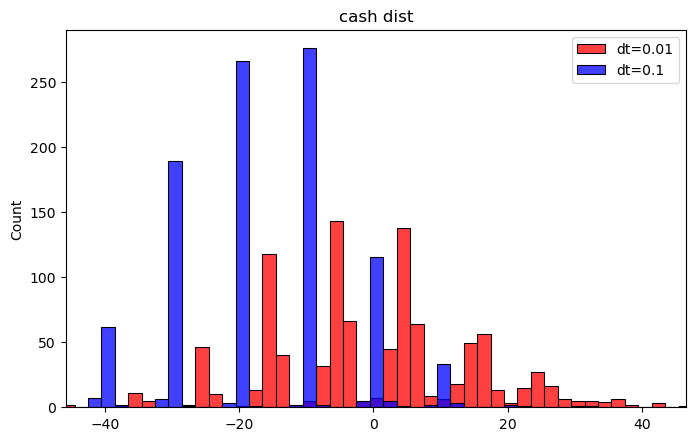

dt=0.01: -0.17045400000000013
dt=0.1: -16.743283


In [35]:
DistributionPlot(cash1, cash2, 'cash dist', 2)
print('dt=0.01:', cash1[:,-1].mean())
print('dt=0.1:',cash2[:,-1].mean())

In [21]:
position1 = np.loadtxt('Data/Meeting 22 June 22/test/T=1/dt=0.01/mm3 Position.txt')
position2 = np.loadtxt('Data/Meeting 22 June 22/test/T=1/dt=0.1/mm3 Position.txt')

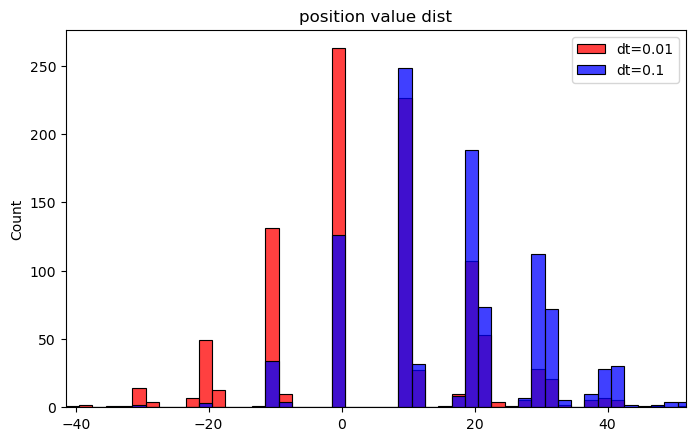

dt=0.01: 4.9951188
dt=0.1: 17.2594842


In [36]:
DistributionPlot(position1, position2, 'position value dist', 2)
print('dt=0.01:', position1[:,-1].mean())
print('dt=0.1:',position2[:,-1].mean())

In [24]:
profit1 = np.loadtxt('Data/Meeting 22 June 22/test/T=1/dt=0.01/mm3 Profit.txt')
profit2 = np.loadtxt('Data/Meeting 22 June 22/test/T=1/dt=0.1/mm3 Profit.txt')

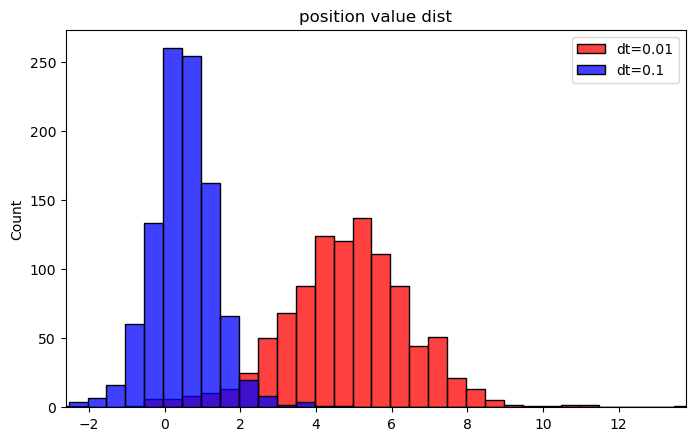

dt=0.01: 4.824663500000001
dt=0.1: 0.5162014


In [37]:
DistributionPlot(profit1, profit2, 'position value dist', 0.5)
print('dt=0.01:', profit1[:,-1].mean())
print('dt=0.1:',profit2[:,-1].mean())

In [32]:
max(profit1[:,-1].min(), profit1[:,-1].max())

13.7749

In [33]:
 profit1[:,-1].max()

13.7749

# Meeing 1 July 2022

## $\alpha = 0.1$

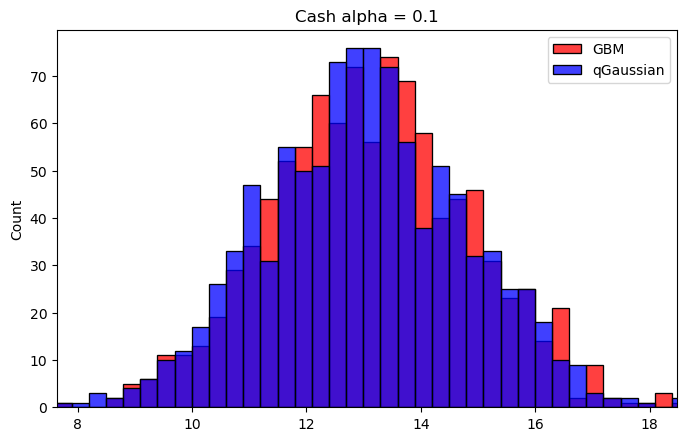

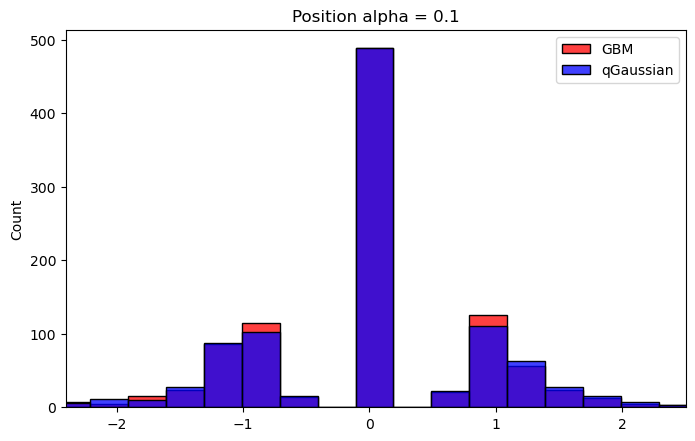

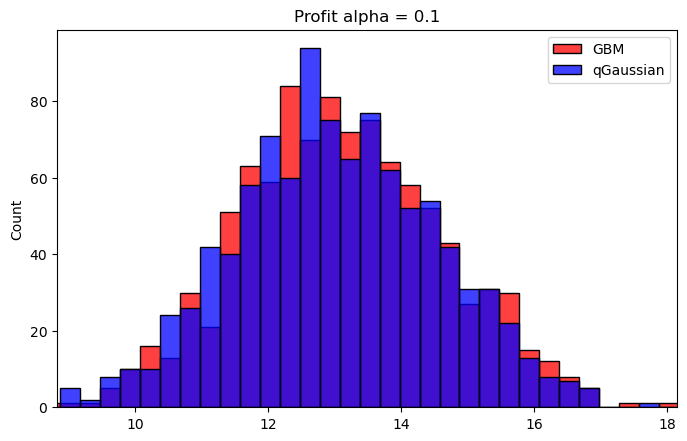

mm2 cash mean: 13.134851399999999
mm3 cash mean: 13.009475599999998
mm2 position value mean: -0.0156487
mm3 position value mean: -0.012290599999999994
mm2 profit mean: 13.119202600000001
mm3 profit mean: 12.9971848
mm2 profit std: 1.5049389812524758
mm3 profit std: 1.5464457132046245


In [26]:
cash2 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.1/mm2 Cash.txt')
position2 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.1/mm2 Position.txt')
profit2 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.1/mm2 Profit.txt')
cash3 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.1/mm3 Cash.txt')
position3 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.1/mm3 Position.txt')
profit3 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.1/mm3 Profit.txt')

DistributionPlot(cash2, cash3, 'Cash alpha = 0.1', 'GBM', 'qGaussian', 0.3)
DistributionPlot(position2, position3, 'Position alpha = 0.1', 'GBM', 'qGaussian', 0.3)
DistributionPlot(profit2, profit3, 'Profit alpha = 0.1', 'GBM', 'qGaussian', 0.3)
print('mm2 cash mean: ' + str(cash2[:, -1].mean()))
print('mm3 cash mean: ' + str(cash3[:, -1].mean()))
print('mm2 position value mean: ' + str(position2[:, -1].mean()))
print('mm3 position value mean: ' + str(position3[:, -1].mean()))
print('mm2 profit mean: ' + str(profit2[:, -1].mean()))
print('mm3 profit mean: ' + str(profit3[:, -1].mean()))
print('mm2 profit std: ' + str(profit2[:, -1].std()))
print('mm3 profit std: ' + str(profit3[:, -1].std()))

## $\alpha = 0.01$

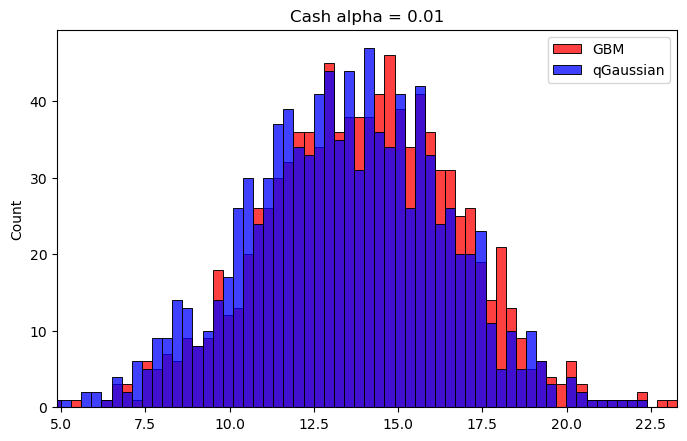

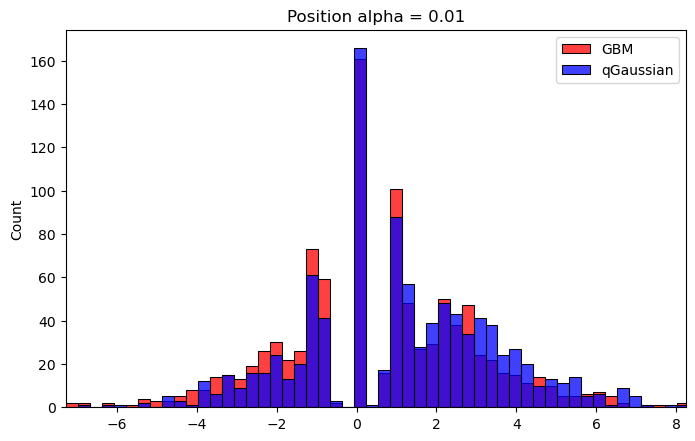

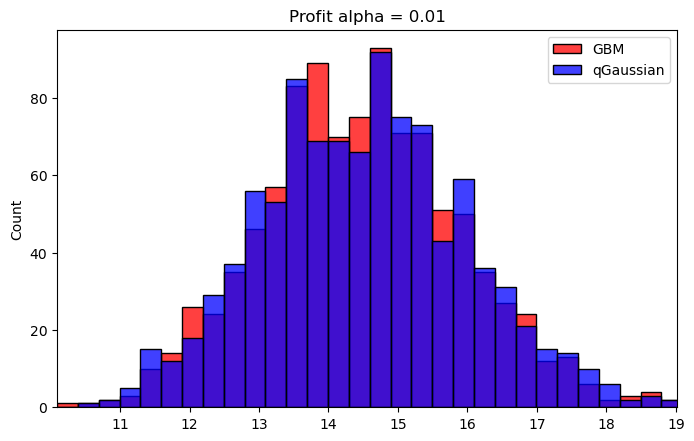

mm2 cash mean: 13.934834900000002
mm3 cash mean: 13.426186199999998
mm2 position value mean: 0.5356806999999999
mm3 position value mean: 1.0893487
mm2 profit mean: 14.4705149
mm3 profit mean: 14.5155345
mm2 profit std: 1.431251268145461
mm3 profit std: 1.4797085748010486


In [27]:
cash2 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.01/mm2 Cash.txt')
position2 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.01/mm2 Position.txt')
profit2 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.01/mm2 Profit.txt')
cash3 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.01/mm3 Cash.txt')
position3 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.01/mm3 Position.txt')
profit3 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.01/mm3 Profit.txt')

DistributionPlot(cash2, cash3, 'Cash alpha = 0.01', 'GBM', 'qGaussian', 0.3)
DistributionPlot(position2, position3, 'Position alpha = 0.01', 'GBM', 'qGaussian', 0.3)
DistributionPlot(profit2, profit3, 'Profit alpha = 0.01', 'GBM', 'qGaussian', 0.3)
print('mm2 cash mean: ' + str(cash2[:, -1].mean()))
print('mm3 cash mean: ' + str(cash3[:, -1].mean()))
print('mm2 position value mean: ' + str(position2[:, -1].mean()))
print('mm3 position value mean: ' + str(position3[:, -1].mean()))
print('mm2 profit mean: ' + str(profit2[:, -1].mean()))
print('mm3 profit mean: ' + str(profit3[:, -1].mean()))
print('mm2 profit std: ' + str(profit2[:, -1].std()))
print('mm3 profit std: ' + str(profit3[:, -1].std()))

## $\alpha = 0.001$

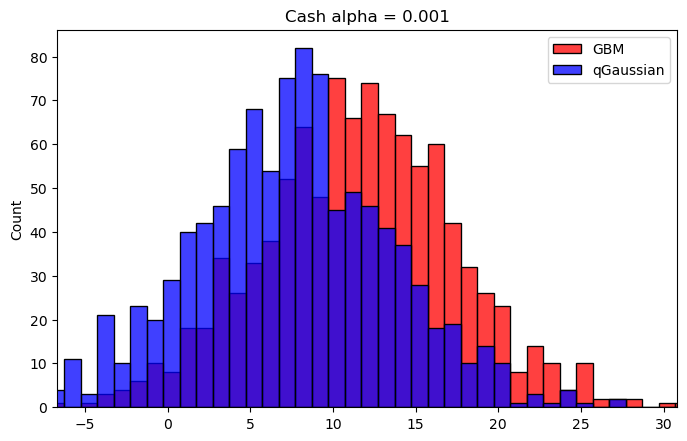

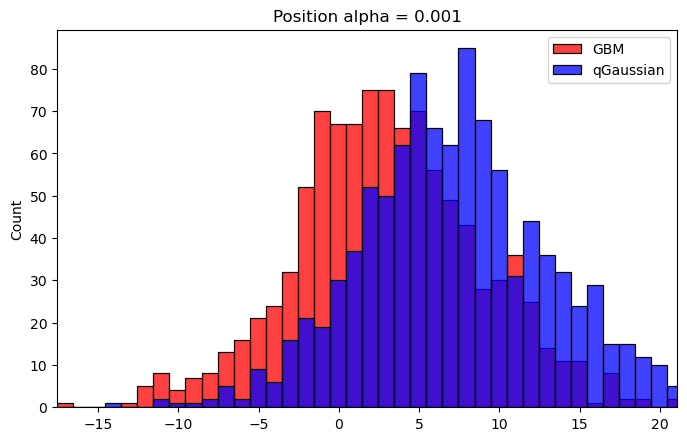

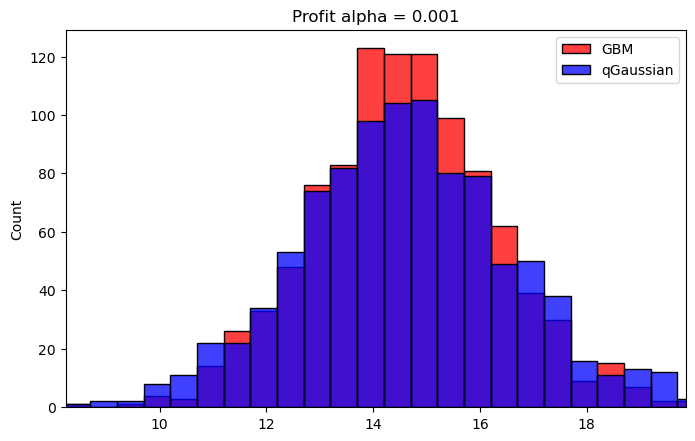

mm2 cash mean: 11.5356793
mm3 cash mean: 7.4447185000000005
mm2 position value mean: 3.0454699
mm3 position value mean: 7.293196599999999
mm2 profit mean: 14.5811487
mm3 profit mean: 14.7379143
mm2 profit std: 1.7063537901204164
mm3 profit std: 2.3072116862580057


In [32]:
cash2 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.001/mm2 Cash.txt')
position2 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.001/mm2 Position.txt')
profit2 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.001/mm2 Profit.txt')
cash3 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.001/mm3 Cash.txt')
position3 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.001/mm3 Position.txt')
profit3 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.001/mm3 Profit.txt')

DistributionPlot(cash2, cash3, 'Cash alpha = 0.001', 'GBM', 'qGaussian', 1)
DistributionPlot(position2, position3, 'Position alpha = 0.001', 'GBM', 'qGaussian', 1)
DistributionPlot(profit2, profit3, 'Profit alpha = 0.001', 'GBM', 'qGaussian', 0.5)
print('mm2 cash mean: ' + str(cash2[:, -1].mean()))
print('mm3 cash mean: ' + str(cash3[:, -1].mean()))
print('mm2 position value mean: ' + str(position2[:, -1].mean()))
print('mm3 position value mean: ' + str(position3[:, -1].mean()))
print('mm2 profit mean: ' + str(profit2[:, -1].mean()))
print('mm3 profit mean: ' + str(profit3[:, -1].mean()))
print('mm2 profit std: ' + str(profit2[:, -1].std()))
print('mm3 profit std: ' + str(profit3[:, -1].std()))

## $\alpha = 0.0001$

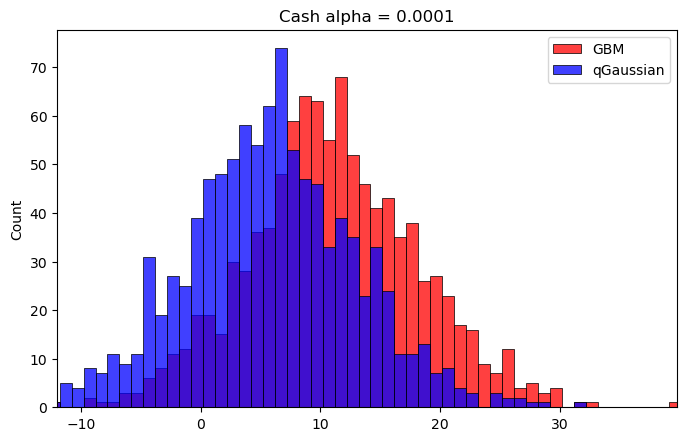

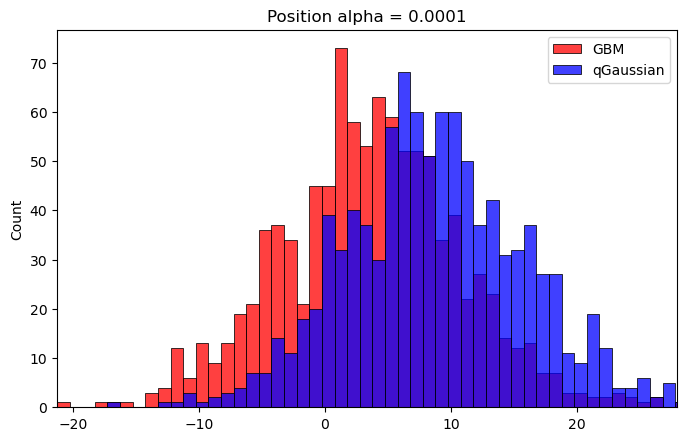

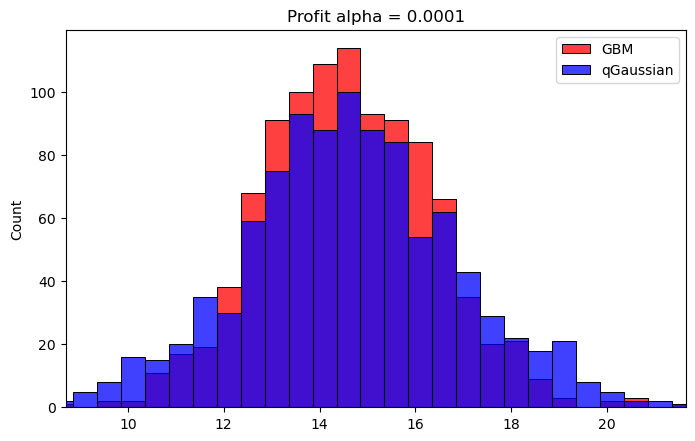

mm2 cash mean: 11.0529753
mm3 cash mean: 5.6975715000000005
mm2 position value mean: 3.5441869
mm3 position value mean: 9.030822899999999
mm2 profit mean: 14.5971624
mm3 profit mean: 14.7283918
mm2 profit std: 1.7739820513653006
mm3 profit std: 2.5115144399570473


In [34]:
cash2 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.0001/mm2 Cash.txt')
position2 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.0001/mm2 Position.txt')
profit2 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.0001/mm2 Profit.txt')
cash3 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.0001/mm3 Cash.txt')
position3 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.0001/mm3 Position.txt')
profit3 = np.loadtxt('Data/Meeting 8 1 July 22/Alpha/Alpha = 0.0001/mm3 Profit.txt')

DistributionPlot(cash2, cash3, 'Cash alpha = 0.0001', 'GBM', 'qGaussian', 1)
DistributionPlot(position2, position3, 'Position alpha = 0.0001', 'GBM', 'qGaussian', 1)
DistributionPlot(profit2, profit3, 'Profit alpha = 0.0001', 'GBM', 'qGaussian', 0.5)
print('mm2 cash mean: ' + str(cash2[:, -1].mean()))
print('mm3 cash mean: ' + str(cash3[:, -1].mean()))
print('mm2 position value mean: ' + str(position2[:, -1].mean()))
print('mm3 position value mean: ' + str(position3[:, -1].mean()))
print('mm2 profit mean: ' + str(profit2[:, -1].mean()))
print('mm3 profit mean: ' + str(profit3[:, -1].mean()))
print('mm2 profit std: ' + str(profit2[:, -1].std()))
print('mm3 profit std: ' + str(profit3[:, -1].std()))

# $k = 2$
## $\alpha = 0.0001$

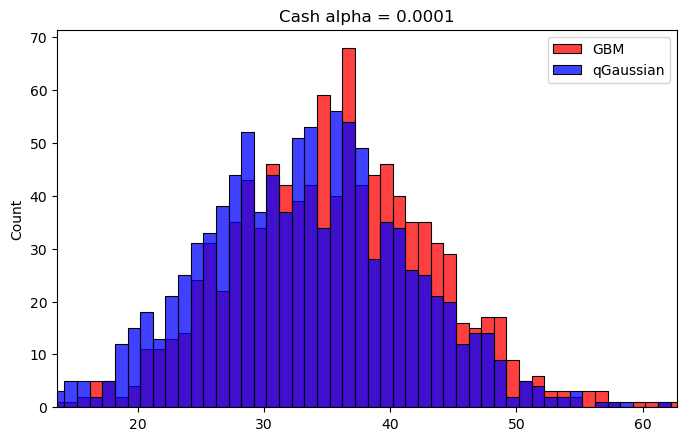

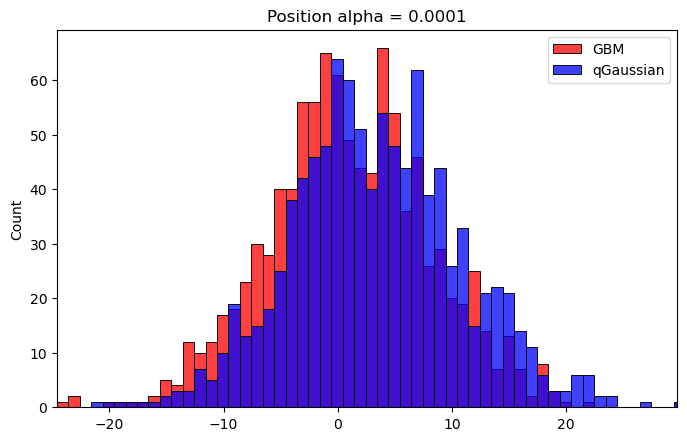

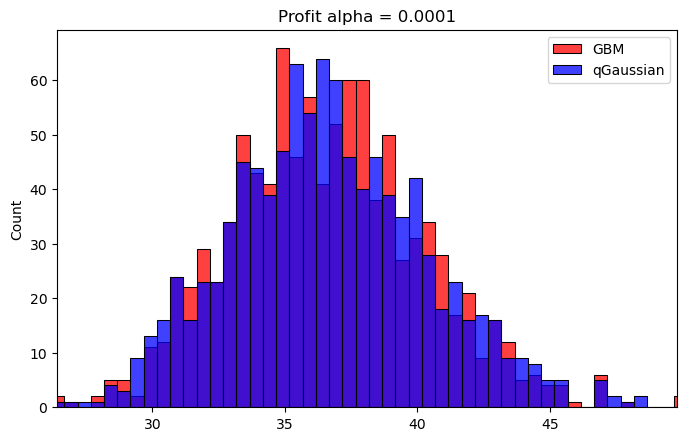

mm2 cash mean: 35.5469194
mm3 cash mean: 33.310989799999994
mm2 position value mean: 1.0385415
mm3 position value mean: 3.3593144999999995
mm2 profit mean: 36.5854621
mm3 profit mean: 36.6703027
mm2 profit std: 3.6427219434282367
mm3 profit std: 3.7718695210124524


In [35]:
cash2 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.0001/mm2 Cash.txt')
position2 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.0001/mm2 Position.txt')
profit2 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.0001/mm2 Profit.txt')
cash3 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.0001/mm3 Cash.txt')
position3 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.0001/mm3 Position.txt')
profit3 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.0001/mm3 Profit.txt')

DistributionPlot(cash2, cash3, 'Cash alpha = 0.0001', 'GBM', 'qGaussian', 1)
DistributionPlot(position2, position3, 'Position alpha = 0.0001', 'GBM', 'qGaussian', 1)
DistributionPlot(profit2, profit3, 'Profit alpha = 0.0001', 'GBM', 'qGaussian', 0.5)
print('mm2 cash mean: ' + str(cash2[:, -1].mean()))
print('mm3 cash mean: ' + str(cash3[:, -1].mean()))
print('mm2 position value mean: ' + str(position2[:, -1].mean()))
print('mm3 position value mean: ' + str(position3[:, -1].mean()))
print('mm2 profit mean: ' + str(profit2[:, -1].mean()))
print('mm3 profit mean: ' + str(profit3[:, -1].mean()))
print('mm2 profit std: ' + str(profit2[:, -1].std()))
print('mm3 profit std: ' + str(profit3[:, -1].std()))

## $\alpha = 0.001$

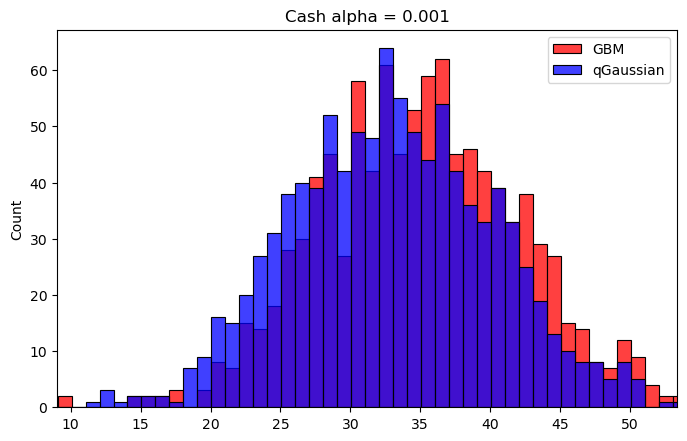

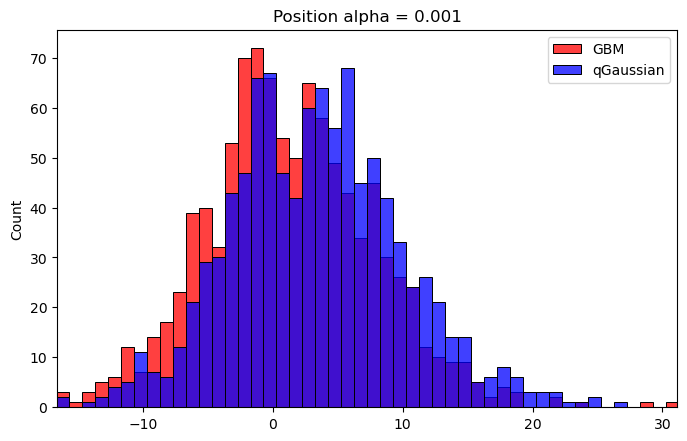

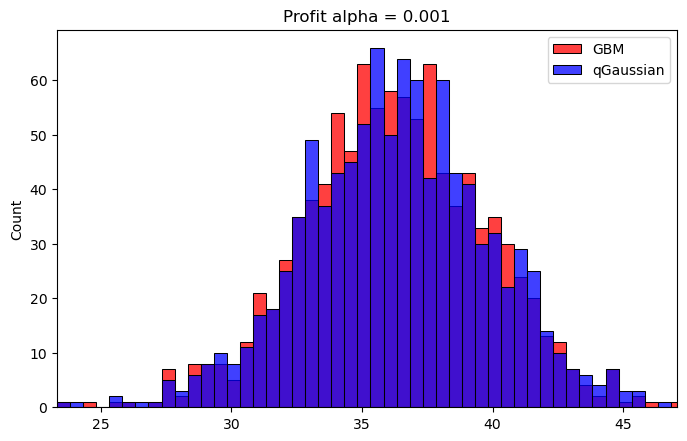

mm2 cash mean: 34.8584179
mm3 cash mean: 32.925607400000004
mm2 position value mean: 1.3882584000000002
mm3 position value mean: 3.403567
mm2 profit mean: 36.2466755
mm3 profit mean: 36.3291751
mm2 profit std: 3.4793024895702516
mm3 profit std: 3.592743972343422


In [37]:
cash2 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.001/mm2 Cash.txt')
position2 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.001/mm2 Position.txt')
profit2 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.001/mm2 Profit.txt')
cash3 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.001/mm3 Cash.txt')
position3 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.001/mm3 Position.txt')
profit3 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.001/mm3 Profit.txt')

DistributionPlot(cash2, cash3, 'Cash alpha = 0.001', 'GBM', 'qGaussian', 1)
DistributionPlot(position2, position3, 'Position alpha = 0.001', 'GBM', 'qGaussian', 1)
DistributionPlot(profit2, profit3, 'Profit alpha = 0.001', 'GBM', 'qGaussian', 0.5)
print('mm2 cash mean: ' + str(cash2[:, -1].mean()))
print('mm3 cash mean: ' + str(cash3[:, -1].mean()))
print('mm2 position value mean: ' + str(position2[:, -1].mean()))
print('mm3 position value mean: ' + str(position3[:, -1].mean()))
print('mm2 profit mean: ' + str(profit2[:, -1].mean()))
print('mm3 profit mean: ' + str(profit3[:, -1].mean()))
print('mm2 profit std: ' + str(profit2[:, -1].std()))
print('mm3 profit std: ' + str(profit3[:, -1].std()))

## $k = 0.01$

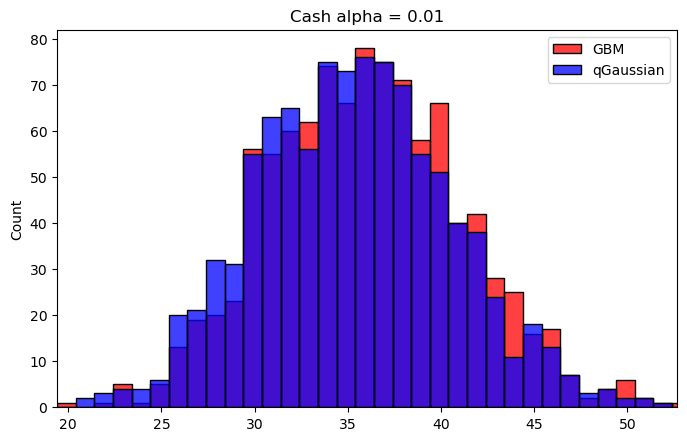

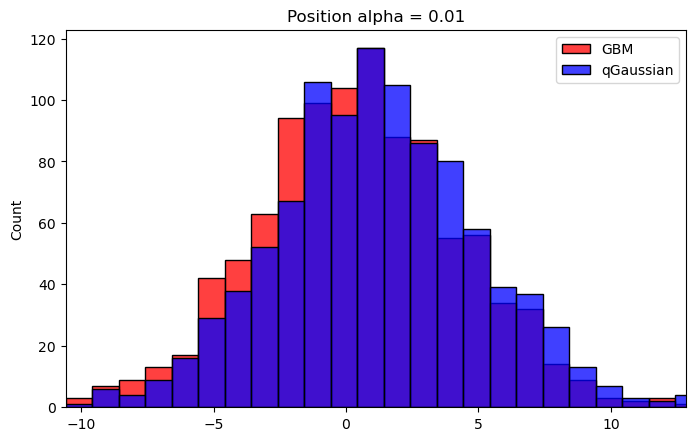

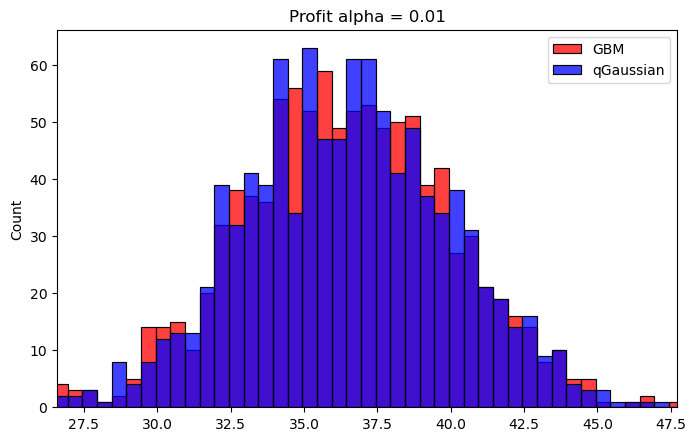

mm2 cash mean: 35.976796799999995
mm3 cash mean: 35.3017148
mm2 position value mean: 0.47524120000000003
mm3 position value mean: 1.1820411
mm2 profit mean: 36.4520377
mm3 profit mean: 36.4837554
mm2 profit std: 3.5098089145406064
mm3 profit std: 3.5445699488020885


In [38]:
cash2 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.01/mm2 Cash.txt')
position2 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.01/mm2 Position.txt')
profit2 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.01/mm2 Profit.txt')
cash3 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.01/mm3 Cash.txt')
position3 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.01/mm3 Position.txt')
profit3 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.01/mm3 Profit.txt')

DistributionPlot(cash2, cash3, 'Cash alpha = 0.01', 'GBM', 'qGaussian', 1)
DistributionPlot(position2, position3, 'Position alpha = 0.01', 'GBM', 'qGaussian', 1)
DistributionPlot(profit2, profit3, 'Profit alpha = 0.01', 'GBM', 'qGaussian', 0.5)
print('mm2 cash mean: ' + str(cash2[:, -1].mean()))
print('mm3 cash mean: ' + str(cash3[:, -1].mean()))
print('mm2 position value mean: ' + str(position2[:, -1].mean()))
print('mm3 position value mean: ' + str(position3[:, -1].mean()))
print('mm2 profit mean: ' + str(profit2[:, -1].mean()))
print('mm3 profit mean: ' + str(profit3[:, -1].mean()))
print('mm2 profit std: ' + str(profit2[:, -1].std()))
print('mm3 profit std: ' + str(profit3[:, -1].std()))

In [7]:
cash2 = np.loadtxt('Data/Meeting 9 8 July 22/mm2 Cash.txt')
cash3 = np.loadtxt('Data/Meeting 9 8 July 22/mm3 Cash.txt')
time = np.loadtxt('Data/Meeting 9 8 July 22/mm3 Time.txt')

No handles with labels found to put in legend.


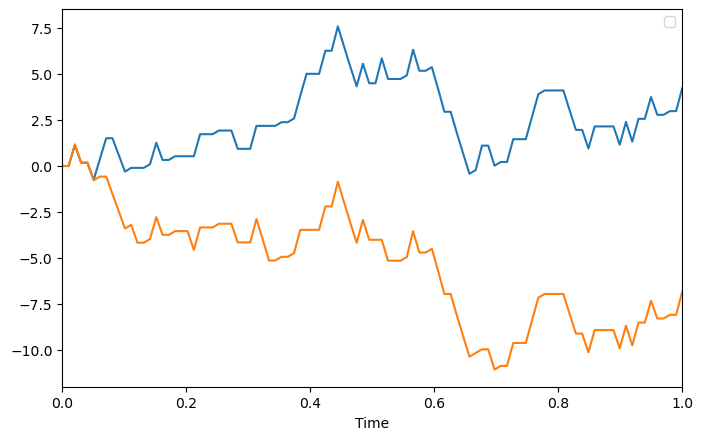

In [10]:
TimeSeriesPlot(time, cash2, cash3, 757, 1)

In [2]:
order1 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.0001/mm2 Order.txt')
order2 = np.loadtxt('Data/Meeting 8 1 July 22/k = 2/alpha = 0.0001/mm3 Order.txt')

In [3]:
np.count_nonzero(order1==1) +np.count_nonzero(order1==2)+2*np.count_nonzero(order1==4)

73062

In [4]:
np.count_nonzero(order2==1) +np.count_nonzero(order2==2)+2*np.count_nonzero(order2==4)

73202